In [10]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("rivalytics/er-wait-time")

print("Path to dataset files:", path)

100%|██████████| 150k/150k [00:00<00:00, 497kB/s]

Extracting files...
Path to dataset files: C:\Users\ALEXANDER\.cache\kagglehub\datasets\rivalytics\er-wait-time\versions\1


In [13]:
import os

path = r"C:\Users\ALEXANDER\.cache\kagglehub\datasets\rivalytics\er-wait-time\versions\1"

# Listar los archivos en la carpeta
print(os.listdir(path))

['ER Wait Time Data Overview.txt', 'ER Wait Time Dataset.csv']


In [14]:
import pandas as pd

path = r"C:\Users\ALEXANDER\.cache\kagglehub\datasets\rivalytics\er-wait-time\versions\1\ER Wait Time Dataset.csv"

# Cargar dataset
df = pd.read_csv(path)

# Vista rápida
print("Dimensiones:", df.shape)
print(df.head())
print(df.info())
print(df.isnull().sum())


Dimensiones: (5000, 19)
               Visit ID Patient ID Hospital ID                 Hospital Name  \
0  HOSP-1-20240210-0001  PAT-00001      HOSP-1  Springfield General Hospital   
1  HOSP-3-20241128-0001  PAT-00002      HOSP-3  Northside Community Hospital   
2  HOSP-3-20240930-0002  PAT-00003      HOSP-3  Northside Community Hospital   
3  HOSP-2-20240227-0001  PAT-00004      HOSP-2      Riverside Medical Center   
4  HOSP-1-20240306-0002  PAT-00005      HOSP-1  Springfield General Hospital   

  Region           Visit Date Day of Week  Season   Time of Day Urgency Level  \
0  Urban  2024-02-10 20:20:56    Saturday  Winter  Late Morning        Medium   
1  Rural  2024-11-28 02:07:47    Thursday    Fall       Evening        Medium   
2  Rural  2024-09-30 04:02:28      Monday    Fall       Evening           Low   
3  Urban  2024-02-27 00:31:13     Tuesday  Winter       Evening          High   
4  Urban  2024-03-06 16:52:26   Wednesday  Spring     Afternoon           Low   

   Nurse

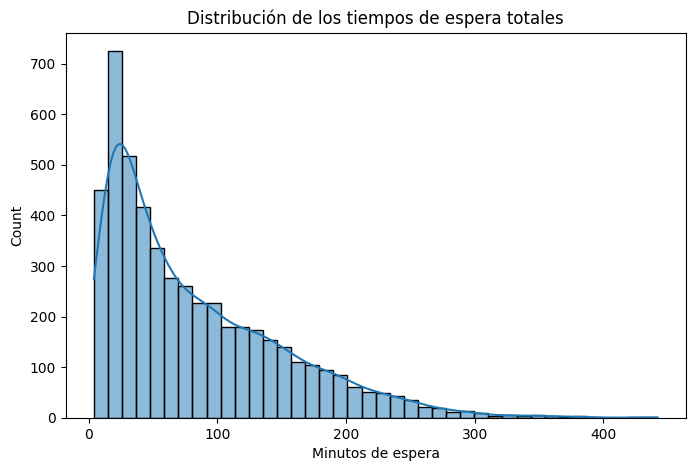

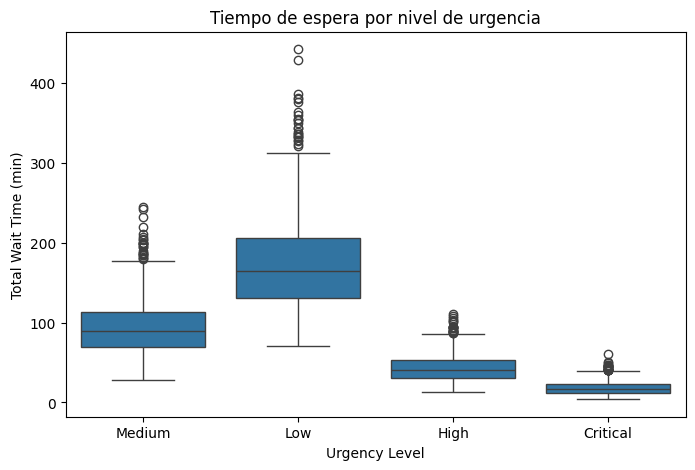

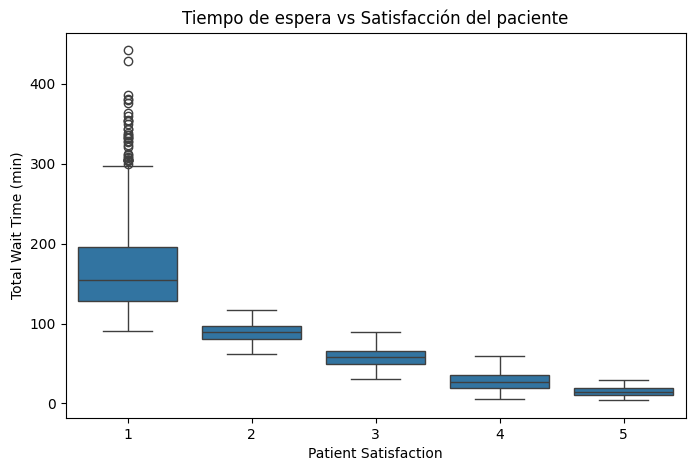

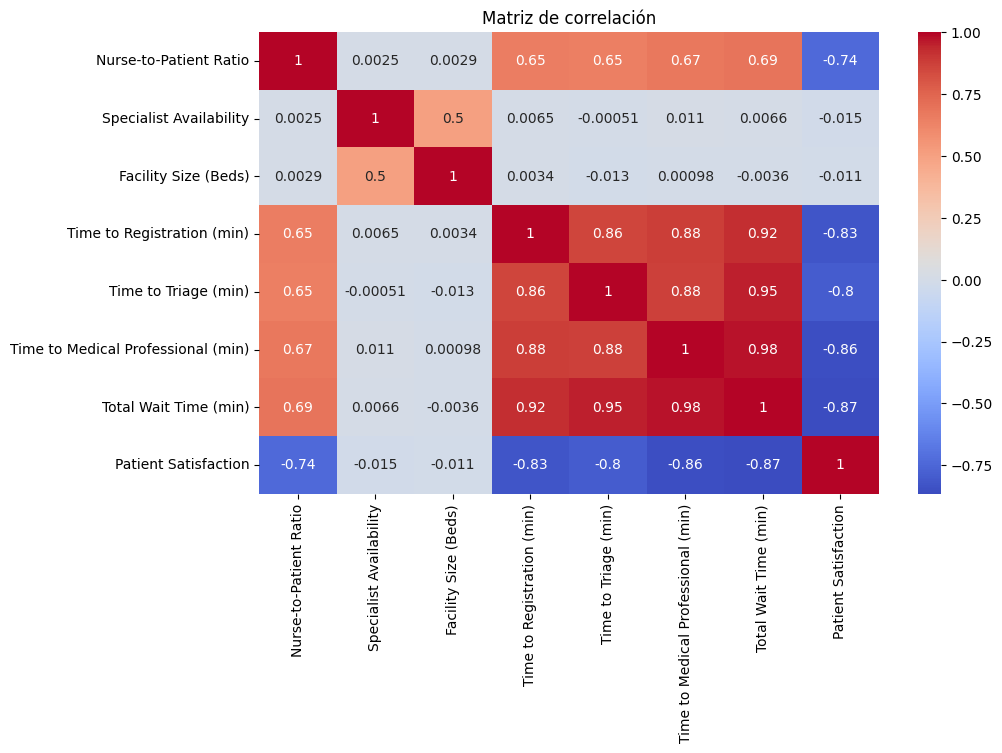

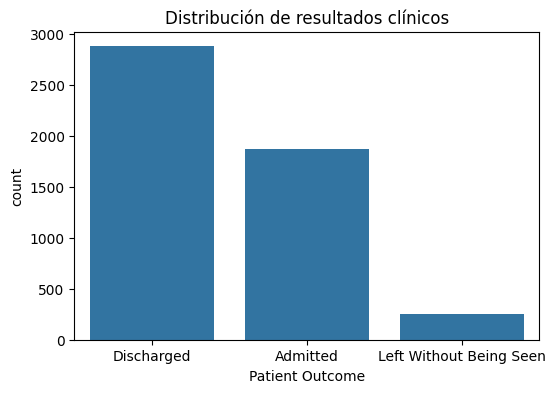

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribución de tiempos de espera
plt.figure(figsize=(8,5))
sns.histplot(df["Total Wait Time (min)"], bins=40, kde=True)
plt.title("Distribución de los tiempos de espera totales")
plt.xlabel("Minutos de espera")
plt.show()

# Boxplot de tiempo de espera según nivel de urgencia
plt.figure(figsize=(8,5))
sns.boxplot(x="Urgency Level", y="Total Wait Time (min)", data=df)
plt.title("Tiempo de espera por nivel de urgencia")
plt.show()

# Relación entre satisfacción y tiempo de espera
plt.figure(figsize=(8,5))
sns.boxplot(x="Patient Satisfaction", y="Total Wait Time (min)", data=df)
plt.title("Tiempo de espera vs Satisfacción del paciente")
plt.show()

# Correlaciones entre variables numéricas
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Matriz de correlación")
plt.show()

# Distribución de resultados clínicos
plt.figure(figsize=(6,4))
sns.countplot(x="Patient Outcome", data=df)
plt.title("Distribución de resultados clínicos")
plt.show()
